<a href="https://colab.research.google.com/github/maria-aguilera/forest-cover-type-prediction/blob/main/forest_cover_type_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Kaggle Competition Predicting Forest Cover Type**

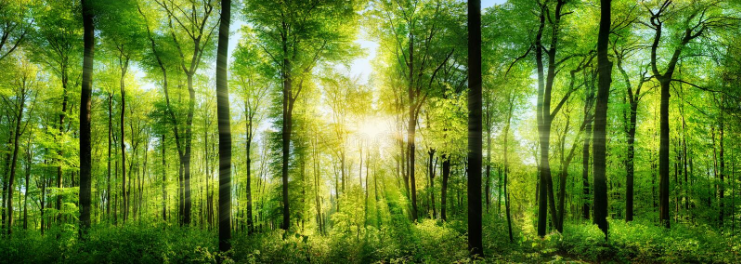


# **Table of Contents**

* [1. Understanding the problem, the requirements and the goal](#1)
  * [1.1 Description](#1.1)
  * [1.2 Feature Definitions](#1.2)
  * [1.3 Setting up environment](#1.3)
* [2. Data Collection: reading the data and understanding the goal](#2)
    * [2.1 Loading the data](#2.1)
    * [2.2 Understanding the data](#2.2)
* [3. Data Cleaning: preparing the data and analyzing it ](#3)
  * [3.1 Checking Data Types](#3.1)
  * [3.2 Checking Missing Values](#3.2) 
  * [3.3 Checking Distribution of Target Variable](#3.3)
  * [3.4 Checking Distribution of Numerical Values](#3.4)
  * [3.5 Checking Outliers](#3.5)
* [4. Exploratory Data Analysis ](#4)
    * [4.1 Numerical Distribution among Cover-Types Box Plots](#4.1)
    * [4.2 Hillshade vs. Aspect Scatter Plot](#4.2)
    * [4.3 Hillshade vs.Slope Scatter Plot](#4.3)
    * [4.4 Soil Type Distribution](#4.3)
    * [4.5 Correlation Matrix](#4.4)
* [5. Split the Dataset into Train and Validation Set](#5)   
* [6. Running the Baseline Models](#6)
    * [6.1 Naive Bayes Classifier on Original Data Set](#6.1)
    * [6.2 KNN Classifier on Original Data Set](#6.2)
    * [6.3 Logistic Regression Classifier on Original Data Set](#6.3)
* [7. Feature Engineering & Dimensionality](#7)
    * [7.1 Feature Selection ](#7.1)
    * [7.1 PCA ](#7.1)
* [8. Model Creation, Comparaison and Hyperparameter Tuning](#8)
    * [8.1 GradientBoosting Classifier](#8.1)
    * [8.2 Random Forest Classifier](#8.2)
    * [8.3 Extra Trees Classifier](#8.3)
* [9. Creating Kaggle Predictions from Chosen Model](#9)

<a id='1'></a>
# 1. Understanding the problem, the requirements and the goal

<a id='1.1'></a>
## 1.1 Description:

Can we forecast the type of tree that would grow in a small section of forest based on elevation, hydrologic, soil, and solar data? The purpose of this study is to forecast the dominating tree species in portions of wooded landscapes.
* We intend to anticipate forest cover type in this project by utilizing cartographic data and a range of classification techniques.
* This research area encompasses four wilderness areas located in northern Colorado's Roosevelt National Forest. 
* Each observation is a 30m x 30m plot of forest cover computed using data from the US Forest Service's Region 2 Resource Information System (RIS). Independent variables were created using data from the US Geological Survey (USGS) and the US Forest Service (USFS).


<a id='1.2'></a>
## 1.2 Variable Definitions

Our dataset contains 54 attriutes/features for the prediction of our target variable: `'Cover_Type` which is our target variable.  Because the target variable has seven distinct classes, this is a Multi-Class Classification problem.
The data set contains 10 numerical variables, 4 binary variables (Wilderness Area) and other 40 binary variable (Soil Type), a total of 54 attributes.

| Variable Name | Data Type | Measurement | Description|
| --- | --- | --- |---|
| Elevation | Numerical | Meters| Elevation in meters|
| Aspect | Numerical | Azimuth| Aspect in degrees Azimuth|
| Slope | Numerical | Degrees | Slope in degrees|
| Horizontal_Distance_To_Hydrology | Numerical | Meters|  Horz Dist to nearest surface water features|
| Vertical_Distance_To_Hydrology | Numerical | Meters|  Vert Dist to nearest surface water features|
| Horizontal_Distance_To_Roadways | Numerical | Meters|   Horz Dist to nearest roadway|
|  Hillshade_9am | Numerical | (0 to 255 index)| Hillshade index at 9am, summer solstice|
|  Hillshade_Noon | Numerical | (0 to 255 index)| Hillshade index at noon, summer solstice|
|  Hillshade_3pm | Numerical | (0 to 255 index)| Hillshade index at 3pm, summer solstice |
|  Horizontal_Distance_To_Fire_Points | Numerical | Meters|  Horz Dist to nearest wildf_trainire ignition points|
|  Wilderness_Area (x4) | Binary | 0 = absence or 1 = presence|   Wilderness area designation |
|  Soil_Type (x40) | Binary | 0 = absence or 1 = presence| Soil Type designation |
|  Cover_Type | Integer | 1 to 7| Forest Cover Type designation |

`Soil_Type`and `Wilderness_Area` are "one-hot encoded" attributes.



#### Wilderness_Area

| Column Name | Name of Wilderness Areas |
| --- | --- |
| Wilderness_Area1 |Rawah Wilderness |
| Wilderness_Area2|  Neota Wilderness Area |
| Wilderness_Area3 | Comanche Wilderness Area| 
| Wilderness_Area4 | Cache La Poudre Wilderness Are |

#### Cover_Type 
(7 types, integers 1 to 7) 

| Integer Value | Name of Cover Type |
| --- | --- |
| 1 | Spruce/Fir |
| 2 | Lodgepole Pine |
| 3 | Ponderosa Pine |
| 4 | Cottonwood/Willow |
| 5 | Aspen |
| 6 | Douglas-fir |
| 7 | Krummholz |


<a id='1.3'></a>
## 1.3 Setting up the Environment:

In [ ]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px


# Importing basic libraries
import pandas as pd
import numpy as np
#from pandas_profiling import ProfileReport
import itertools
from numpy import percentile
# Importing Machine Learning libraries
import sklearn


# Tranformers
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, OneHotEncoder,FunctionTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectFromModel
from category_encoders import TargetEncoder


# Model Evaluation
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split, KFold,RandomizedSearchCV, learning_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


# Pipelines
from sklearn.pipeline import Pipeline,make_pipeline, FeatureUnion 
# from sklearn.base import Besvalidimator, TransformerMixin
from sklearn.compose import ColumnTransformer, make_column_transformer,make_column_selector

# Machine Learning Models
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier,RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils.extmath import softmax

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

sns.set()

<a id='2'></a>
## 2.Data Collection: reading the data and understanding the goal

<a id='2.1'></a>
## 2.1 Loading the data:

* We will use the dataset provided by the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Covertype).
* Each entry is an observation on a 30 30 m plot of forest land, with the purpose of predicting the cover type of this area.
* The training set is selected in such a way that each class has the same amount of observations.

In [ ]:
# Importing the data
df_train = pd.read_csv('data/train.csv')

In [ ]:
# Setting the Id as index might help in fetching data easier
df_train.set_index('Id',inplace=True)

In [ ]:
# Inspecting first rows
df_train.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,
1,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
2,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
3,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
4,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
5,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [ ]:
print(f'valid set has {df_train.shape[0]} observations and {df_train.shape[1]-1} features.')

valid set has 15120 observations and 54 features.


Our dataset contains 54 features for the prediction of our target variable: `Cover_Type`. Because the target variable has seven distinct classes, this is a Multi-Class Classification problem.
It contains information on the:
- **Type of Forest Cover** i.e. tree type (`Cover_Type`)
- **Shadow Coverage**(`Hillshade_9am`, `Hillshade_Noon`,`Hillshade_3pm`)
- **Near Landmarks**(`Horizontal_Distance_To_Fire_Points`,`Horizontal_Distance_To_Roadways`,
`Horizontal_Distance_to_Hydrology`,`Vertical_Distance_To_Hydrology`)
- **Area Terrain** (`Elevation`, `Aspect`,`Slope`)
of 4 different **Wilderness Sreas** and with 40 different **Soil Types**.
 As a result, it has 10 numerical variables, four binary variables (`Wilderness Area`), and forty binary variables (`Soil Type`), a total of 54 attributes




Let's now visualize the dataset to see where to begin.

<a id='2.2'></a>
## 2.2 Understanding the Data

#### Slope (degrees)
Slope is the steepness or degree of incline of a surface. Then, the slope for a particular location is computed as the maximum rate of change of elevation between that location and its surroundings. Slope can be expressed either in degrees or as a percentage.

#### Aspect (azimuth)
Aspect is the orientation of slope, measured clockwise in degrees from 0 to 360, where 0 is north-facing, 90 is east-facing, 180 is south-facing, and 270 is west-facing.

The azimuth is the angular direction of the sun, measured from north in clockwise degrees from 0 to 360. An azimuth of 90 degrees is east. The default azimuth is 315 degrees (NW).

#### Hillshade (0 to 255 index)
Hillshading computes surface illumination as values from 0 to 255 based on a given compass direction to the sun (azimuth) and a certain altitude above the horizon (altitude) (0 no light; 255 maximum light).

Hillshade at time t varies as a factor of:
$$ cos(slope)cos(90−Altitude)+sin(slope)sin(90−Altitude)cos(Azimuth−Aspect)$$

where Altitude is the angle of the Sun relative to the horizon and Azimuth relates to the direction the Sun is facing: North, South, East, or West. Azimuth of 90 degrees corresponds to East.

This equation actually arises from a theorem in Spherical geometry known as “Spherical law of Cosines” relating the sides and angles of triangles constructed on spherical surfaces.

In a unit sphere, lengths a, b, c correspond to the angle subtended by those sides from the center of the sphere. If we know the two sides a, b and the angle between them C, then the cosine of c, is given by:
![image.png](attachment:98ac3019-5ea8-4e57-b09e-9b6706249d29.png)


The azimuth is the angular direction of the sun, measured from north in clockwise degrees from 0 to 360. An azimuth of 90 degrees is east. The default azimuth is 315 degrees (NW).

The altitude is the slope or angle of the illumination source above the horizon. The units are in degrees, from 0 (on the horizon) to 90 (overhead). The default is 45 degrees.

![image.png](attachment:88d6e948-019b-41d6-9609-97fe773ac41f.png)

In short, the Illumination of the patch(Hillshade) is related to alitude of the sun, slope of the terrain and the aspect.More details can be found in How Hillshade works.We might have features like Aspect, Slope and HillShade that provides similar information.

[For more information ](https://pro.arcgis.com/en/pro-app/2.8/tool-reference/3d-analyst/how-hillshade-works.htm)



In [ ]:
#profile = ProfileReport(df_train, title="Pandas Profiling Report", minimal=False)
#profile

<a id='3'></a>
# 3. Data Cleaning: preparing the data and analyzing it.

In [ ]:
# Create list of col for each
features = [x for x in df_train.columns if x not in ['Id','Cover_Type']]
wilderness_cols = [x for x in features if x.startswith('Wild')]
soiltype_cols = [x for x in features if x.startswith('Soil')]
binary_cols = [x for x in features if x.startswith('Soil') or x in wilderness_cols]
numerical_cols = [x for x in features if x not in binary_cols]

<a id='3.1'></a>
# 3.1 Checking Data Types

In [ ]:
# Check data type of columns
df_train.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Wilderness_Area1                      int64
Wilderness_Area2                      int64
Wilderness_Area3                      int64
Wilderness_Area4                      int64
Soil_Type1                            int64
Soil_Type2                            int64
Soil_Type3                            int64
Soil_Type4                            int64
Soil_Type5                            int64
Soil_Type6                            int64
Soil_Type7                            int64
Soil_Type8                            int64
Soil_Type9                      

All the fields are of integer data-type, so no coversions are really needed; however; we will create another data frame with `Wilderness_Type`and `Cover_Type` not one-hot encoded; for better analysis and to try whether OneHotEncoding gives the most accurate results.

#### Checking One-Hot Encoded Variables

In [ ]:
val_df_train = df_train.filter(regex="Soil_Type", axis=1)
df_train1 = df_train.copy()
ohe_cols = ["Wilderness_Area", "Soil_Type"]
for idx, val in enumerate(ohe_cols):

    # Filter data not on its contents but on it's index labels
    val_df_train = df_train.filter(regex=val, axis=1)
    # Check is every row of the selected columns has one and only one column coded as 1
    print(f"{val} only one and only column encoded as one? {((val_df_train.sum(axis=1)) == 1).all()}")
    df_train1[val] = val_df_train.dot(val_df_train.columns)

Wilderness_Area only one and only column encoded as one? True
Soil_Type only one and only column encoded as one? True


#### Creating a new data frame `df_train1` with One-Hot-Encoded variables categorical

In [ ]:
# Function from github
def split_numbers_chars(row):
    '''This function fetches the numerical characters at the end of a string
    and returns alphabetical character and numerical chaarcters respectively'''
    head = row.rstrip('0123456789')
    tail = row[len(head):]
    return head, tail

def reverse_one_hot_encode(dataframe, start_loc, end_loc, numeric_column_name):
    ''' this function takes the start and end location of the one-hot-encoded column set and numeric column name to be created as arguments
    1) transforms one-hot-encoded columns into one column consisting of column names with string data type
    2) splits string column into the alphabetical and numerical characters
    3) fetches numerical character and creates numeric column in the given dataframe
    '''
    dataframe['String_Column'] = (dataframe.iloc[:, start_loc:end_loc] == 1).idxmax(1)
    dataframe['Tuple_Column'] = dataframe['String_Column'].apply(split_numbers_chars)
    dataframe[numeric_column_name] = dataframe['Tuple_Column'].apply(lambda x: x[1]).astype('int64')
    dataframe.drop(columns=['String_Column','Tuple_Column'], inplace=True)

In [ ]:
# Creating a couple
df_train1 = df_train.copy()

In [ ]:
# Reverse One-Hot Encode Categorical Variables
reverse_one_hot_encode(df_train1, 11, 15, "Wilderness_Type")
reverse_one_hot_encode(df_train1, 14, 54, "Soil_Type")

In [ ]:
# Drop Wilderness and soil_type cols
df_train1 = df_train1.drop(columns = wilderness_cols)
df_train1 = df_train1.drop(columns = soiltype_cols)

In [ ]:
# Change to categorical after 
df_train1['Soil_Type'] = df_train1.Soil_Type.astype('category')
df_train1['Wilderness_Type'] = df_train1.Wilderness_Type.astype('category')

<a id='3.2'></a>
## 3.2 Checking Missing Values

There are no missing values in the dataset, hence all features could be used without any imputing strategy.

In [ ]:
# Checking Missing Values
df_train[df_train.isnull().any(axis=1)]

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
Id,,,,,,,,,,,,,,,,,,,,,


<a id='3.3'></a>
## 3.3 Checking Distribution of Target Variable

In [ ]:
# Count per Type of Forest Cover Type
df_train["Cover_Type"].value_counts()

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64

* The kaggle training data was not a simple random sample of the entire dataset,but a stratified sample of the seven forest classes. The training data was equally distributed among the seven classes; therefore no bias and we can use accuracy as our error metric.


<a id='3.4'></a>
## 3.4 Checking Distribution of Numerical Values

 Let’s look at the underlying data distribution of each column and see if they follow a normal distribution. Based on that, we will decide whether to identify outliers by z-score or by IQR.

#### Histogram Plots

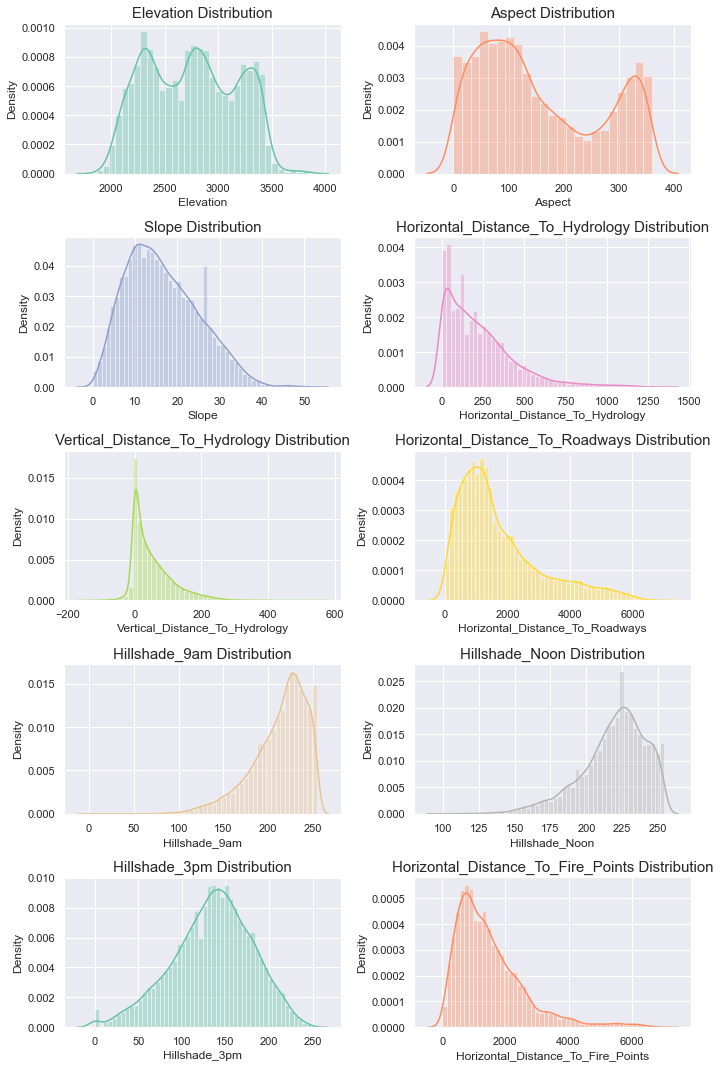

In [ ]:
# Plotting histograms for numerical features
numerical_features = df_train[numerical_cols]

palette = itertools.cycle(sns.color_palette('Set2'))
plt.figure(figsize = (10,15))
for i, col in enumerate(numerical_features):
    plt.subplot(5,2,i+1)
    sns.distplot(numerical_features[col],color=next(palette))
    plt.title(f'{col} Distribution', fontsize = 15)
    plt.tight_layout()

plt.show()

* `Elevation` and `Hillshade_3pm` are faily symmetrical.
* `Aspct` seems bimodal.
* `Horizontal_Distance_To_Fire_Points`,`Vertical_Distance_To_Hydrology`,`Horizontal_Distance_To_Hydrology`,`Horizontal_Distance_To_Roadways`, `Slope` are right skewed, where the median is lower than the mean. This means the mass of the distributio is concentrated to the left. his means that mostly all of the observations have will have 0 value for this feature.
* `Hillshade_Noon`and `Hillshade_9am`are left skewed, where the median is greater than the mean.

We will plot a box-plt for easier analysis and the Descriptive Statistics to dive deeper.


#### Histogram Plots per Cover Type

Maybe it makes more sense to plot the histograms per Cover Type

In [ ]:
palette = itertools.cycle(sns.color_palette())

def plot_numerical_graph1(feature):
    plt.figure()
    plt.subplots(2, 3, figsize=(16, 10))
    for i, label in enumerate([1,2,3,4,5,6], start = 1):
        plt.subplot(2, 3, i)
        plt.gca().set_aspect('auto')
        sns.histplot(df_train[df_train.Cover_Type == label][feature],color = next(palette), kde=True, stat = 'density', bins=50, label=f'cover type {label}')
        plt.xlabel(feature, fontsize=12)
        plt.legend()
        plt.title(f'{label} Distribution for each Cover Type');
    
    plt.show()

<Figure size 432x288 with 0 Axes>

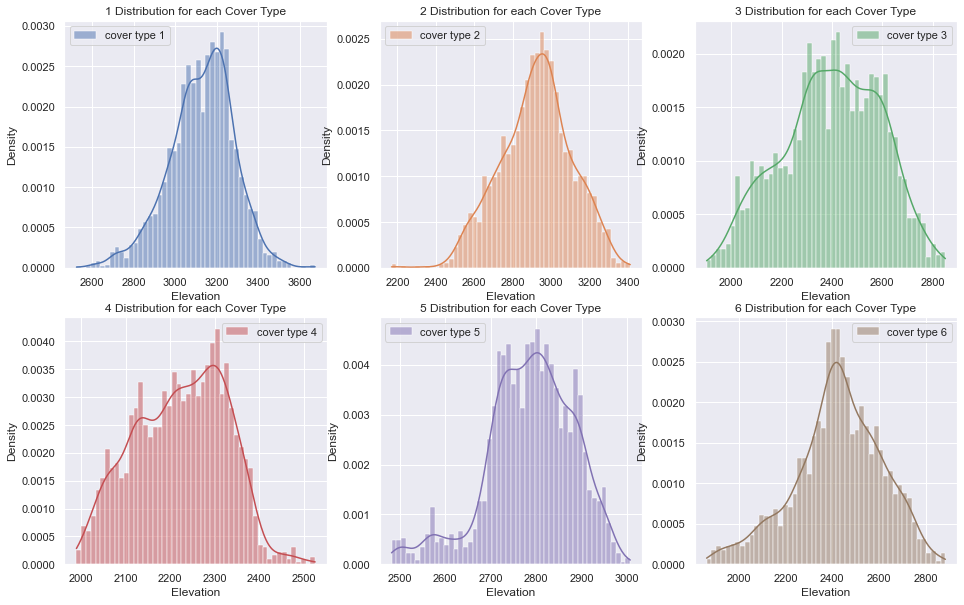

In [ ]:
plot_numerical_graph1('Elevation')
plt.show()

We can confirm `Elevation` is fairly symmetrical.

From slightly right skewed to normally distributed:  `Hillshade_9am, Hillshade_Noon,Hillshade_3pm`

#### Descriptive Statistics

In [ ]:
# Observe describe statistics of numerical values
df_train[numerical_cols].describe().T.sort_values('std',ascending = False).drop(columns= 'count').sort_values('std',ascending = False).round(3)

,mean,std,min,25%,50%,75%,max
Horizontal_Distance_To_Roadways,1714.023,1325.066,0.0,764.0,1316.0,2270.00,6890.0
Horizontal_Distance_To_Fire_Points,1511.147,1099.936,0.0,730.0,1256.0,1988.25,6993.0
Elevation,2749.323,417.678,1863.0,2376.0,2752.0,3104.00,3849.0
Horizontal_Distance_To_Hydrology,227.196,210.075,0.0,67.0,180.0,330.00,1343.0
Aspect,156.677,110.086,0.0,65.0,126.0,261.00,360.0
Vertical_Distance_To_Hydrology,51.077,61.239,-146.0,5.0,32.0,79.00,554.0
Hillshade_3pm,135.092,45.895,0.0,106.0,138.0,167.00,248.0
Hillshade_9am,212.704,30.561,0.0,196.0,220.0,235.00,254.0
Hillshade_Noon,218.966,22.802,99.0,207.0,223.0,235.00,254.0
Slope,16.502,8.454,0.0,10.0,15.0,22.00,52.0


* Mean of features vary from 16 to 2749, therefore the ranges vary (scaling of features will be required).
* `Standard deviation` tells us how spread the data is from the mean. `Horizontal_Distance_To_Roadways`is the most spread followed by `Horizontal_Distance_To_Fire_Points`, and `Elevation`. `Slope` is the most densely packed and closest to the mean, followed by the three Hillshade features.
* All attributes have values greater than 0 , except `vertical_distance_to_hydrology` which has some negative values. The definition is "vertical distance to nearest surface water features". Based on research and logic, negative values imply that the nearest surface water is below that data point or that it is below sea level. Therefore, we do not feel these are due to error; we decide to keep the negative values.
* `Hillshade` attributes have a similar maximum value.
* The reason that some features are widley spread with high values and some features are not is because half of the attributes are measured in meters, so it makes sense that they thse have high values and ranges. Those measured in metres include: `Elevation`, `Horizontal_Distance_To_Hydrology` , `Vertical_Distance_To_Hydrology`, `Horizontal_Distance_To_Roadways`, `Horizontal_Distance_To_Fire_Points`.
* `Aspect` and `Slope`are measured in degrees so their maximum values make sense.
 

#### Box Plot

This will also give us an idea of outliers.

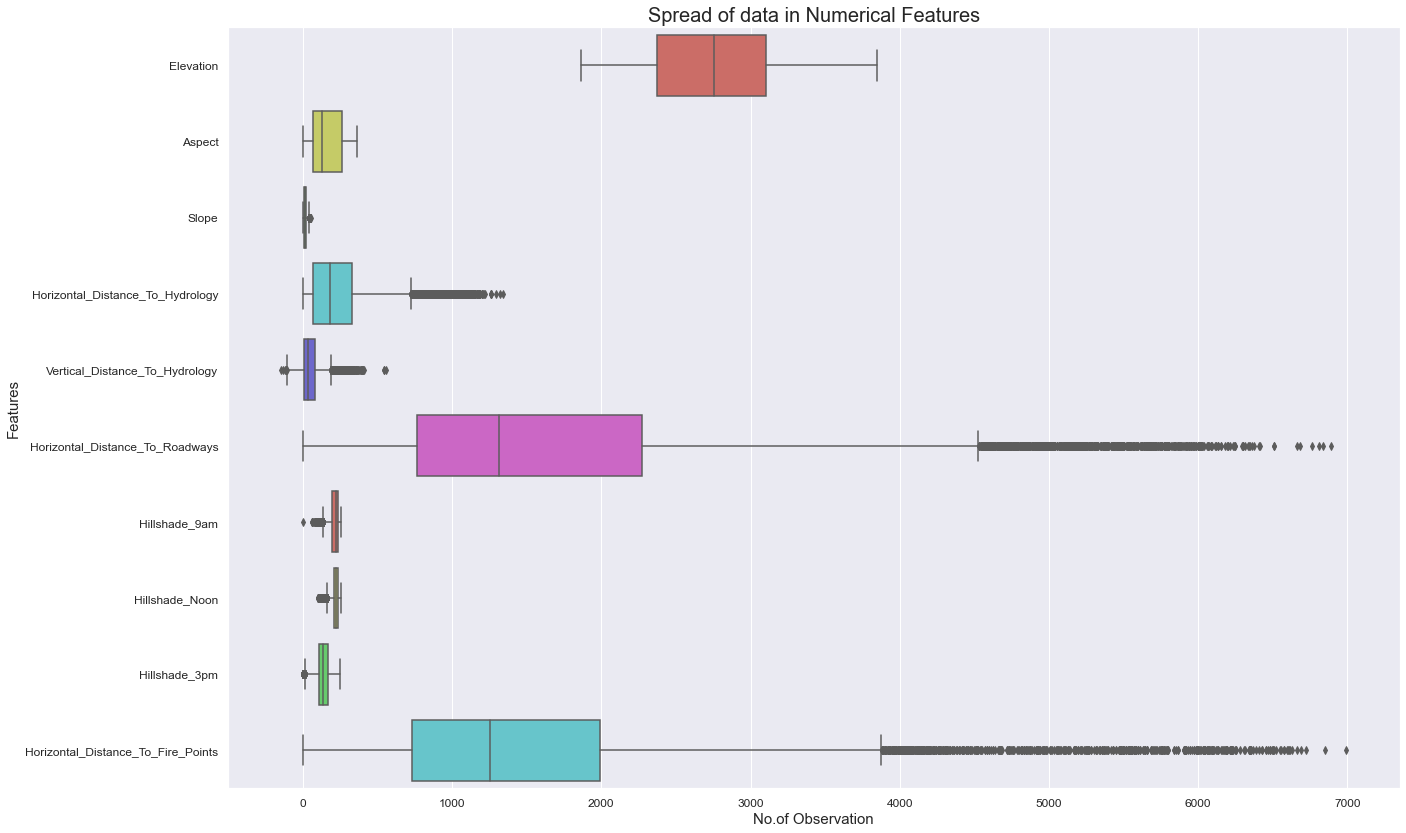

In [ ]:
%matplotlib inline
plt.subplots(figsize = (21,14))
sns.boxplot(data = df_train[numerical_cols], orient='h', palette=sns.color_palette('hls'))
plt.title('Spread of data in Numerical Features', size = 20)
plt.xlabel('No.of Observation', size = 15)
plt.ylabel('Features', size = 15)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.show()

* As mentioned above, `Slope`is the most squeezed box plot attribute, although it has outliers.
* `Aspect` is the only attribute without outliers. It has a greater maximum score and therefore has a much bigger range.
* `Hillshade`variables also have a similar box- plot to `Slope`, with many outliers and a small range.
* `Vertical_Distance_To_Hydrology` plot is similar to `Slope`, with the exception that the minimum value is negative, as we saw in the descriptive statistics.
* As seen above `Elevation`and `Hillshade_Noon` (excluding `Vertical_Distance_To_Hydrology` are the only variables that don't have a minumum value of 0. 
* `Horizontal_Distance_To_Roadways`is the most spread as it has the highest standard deviation followed by `HOrizontal_Distance_To_Fire_Points`.

We will check the count of 0's per column as many of the numerical values seem to have a large number of 0's.

#### Checking the number of 0's 

In [ ]:
for col in numerical_cols:
    print(f'Sum of 0 values in {col}:{(df_train[col] == 0).sum()}')

Sum of 0 values in Elevation:0
Sum of 0 values in Aspect:110
Sum of 0 values in Slope:5
Sum of 0 values in Horizontal_Distance_To_Hydrology:1590
Sum of 0 values in Vertical_Distance_To_Hydrology:1890
Sum of 0 values in Horizontal_Distance_To_Roadways:3
Sum of 0 values in Hillshade_9am:1
Sum of 0 values in Hillshade_Noon:0
Sum of 0 values in Hillshade_3pm:88
Sum of 0 values in Horizontal_Distance_To_Fire_Points:2


We find that `Hillshade_3pm` has many 0 values and we suspect this is an error as 0 is no light..

We create function to train on a forest regression and predict the values of `Hillshade_3pm` when it has a 0 value. 

In [ ]:
def split_missing(data):    
    feature_cols_missing= [col for col in data.columns if col  not in ['Hillshade_3pm','Id']]
    X_train=data[feature_cols_missing][data.Hillshade_3pm!=0]
    y_train=data['Hillshade_3pm'][data.Hillshade_3pm!=0]
    X_valid=data[feature_cols_missing][data.Hillshade_3pm==0]
    return X_train,y_train,X_valid

In [ ]:
def fill_missing(data):
    x_train,y_train,x_valid=split_missing(data)
    rfg=RandomForestRegressor(n_estimators=100)
    rfg.fit(x_train,y_train)
    data.Hillshade_3pm.loc[data.Hillshade_3pm==0]=np.around(rfg.predict(x_valid))
    return data

In [ ]:
df_train = fill_missing(df_train)

<a id='3.5'></a>
## 3.5 Checking Outliers

Since not all the features follow a normal distribution, we will use the IQR to find outliers.
We are using 3 times the IQR for each feature to identify the outliers.

In [ ]:
# Finding outliers
def outlier_function(df_train, col_name):
    ''' this function detects first and third quartile and interquartile range for a given column of a dataframe
    then calculates upper and lower limits to determine outliers conservatively
    returns the number of lower and uper limit and number of outliers respectively
    '''
    first_quartile = np.percentile(np.array(df_train[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df_train[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df_train[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [ ]:
# Finding outliers per columns
for col in numerical_cols:
    if outlier_function(df_train, col)[2] > 0:
        print("There are {} outliers in {}".format(outlier_function(df_train, col)[2], col))

There are 53 outliers in Horizontal_Distance_To_Hydrology
There are 49 outliers in Vertical_Distance_To_Hydrology
There are 3 outliers in Horizontal_Distance_To_Roadways
There are 7 outliers in Hillshade_9am
There are 20 outliers in Hillshade_Noon
There are 132 outliers in Horizontal_Distance_To_Fire_Points


We see that there are 264 outliers but we figure that it makes more sense to look at outliers per Cover Type as they outliers could help us predict the tree class.

In [ ]:
# Find outliers per cove
from numpy import percentile
import itertools
def findCutOff(feature):
    #print(feature.index[feature>20])
    q25, q75 = percentile(feature, 25), percentile(feature, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 3
    lower, upper = q25 - cut_off, q75 + cut_off
    #return lower, upper
    return feature.index[(feature<lower)|(feature>upper)].tolist()

In [ ]:
columns = ['Slope','Vertical_Distance_To_Hydrology','Horizontal_Distance_To_Hydrology','Horizontal_Distance_To_Roadways',
          'Horizontal_Distance_To_Fire_Points','Hillshade_9am','Hillshade_Noon','Hillshade_3pm']

all_outliers=[]

for column in columns:
    #outliers
    slope= df_train.groupby('Cover_Type')[column].agg(findCutOff)
    merged_slope = list(itertools.chain.from_iterable(slope))
    all_outliers.append(merged_slope)

all_outliers = list(itertools.chain.from_iterable(all_outliers))
print("Total number of outliers: ",len(all_outliers))
print("Total number of outliers by cover type: ")
unique_index=np.unique(all_outliers)

df_train.loc[unique_index,:].Cover_Type.value_counts()

Total number of outliers:  170
Total number of outliers by cover type: 


5    82
2    41
1    26
7     9
6     1
Name: Cover_Type, dtype: int64

#### Observations of outliers
There are total of 170 outliers and most of the outliers are in Wilderness_Area5, some are in Wilderness_Area1. We remove the outliers before modelling under the assumption that their removal will improve model performance.

#### Creating FunctionTranformer to Remove Outliers

Before doing the modeling we removed the outliers and checked our model if it performs better without outliers but our model performs well with outliers included

In [ ]:
#df_train.drop(unique_index,axis='rows',inplace=True)


<a id='4'></a>
# 4. Exploratory Data Anaysis

<a id='4.1'></a>
## 4.1 Numerical Distribution among Cover Types- Box Plots


This will give us an idea of which variables are important to predict Cover Type.

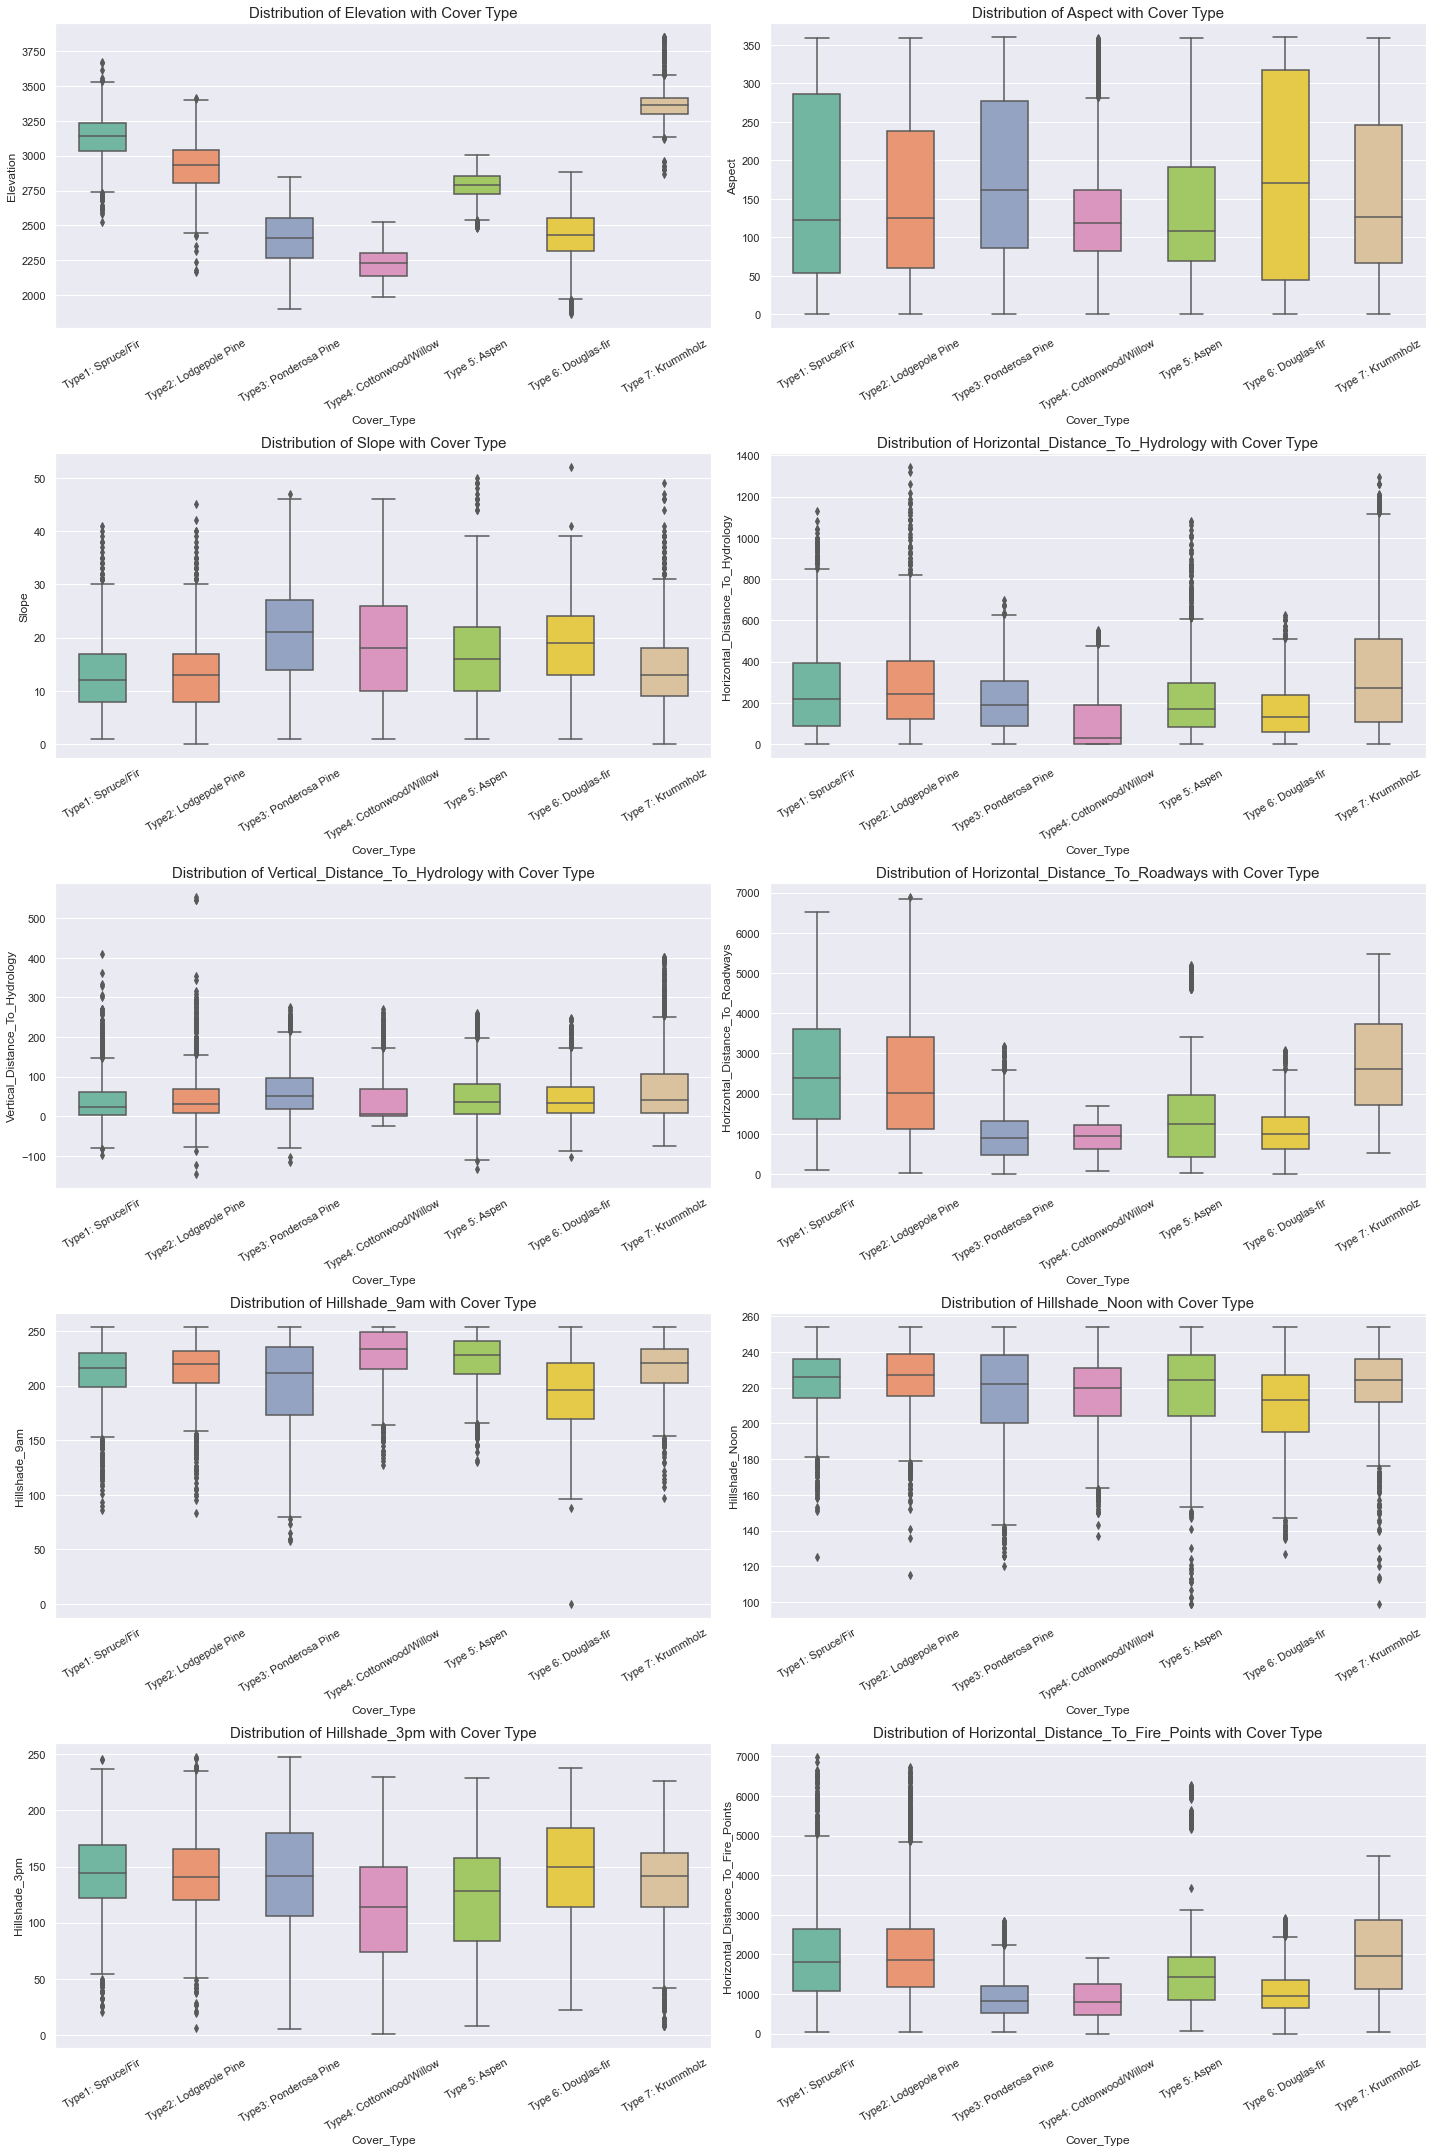

In [ ]:
cmap = sns.color_palette("Set2")
labels = 'Type1: Spruce/Fir', 'Type2: Lodgepole Pine', 'Type3: Ponderosa Pine', 'Type4: Cottonwood/Willow', 'Type 5: Aspen', 'Type 6: Douglas-fir', 'Type 7: Krummholz'
numerical_features['Cover_Type'] = df_train['Cover_Type']

plt.figure(figsize = (20,30))
for i, col in enumerate(numerical_cols):
    plt.subplot(5,2,i+1)
    ax = sns.boxplot(x =df_train['Cover_Type'], y = col, data = df_train, palette = cmap,width = 0.5)
    ax.set_xticklabels(labels, rotation=30)
    plt.title(f'Distribution of {col} with Cover Type', fontsize = 15)
    plt.tight_layout()
plt.show()


Looking at the data distribution in the context of class seperation, elevation could be the most significant factor in determining cover type. Also, apart from elevation the rest of the features are almost similarly distributed between CoverType1 and CoverType2.

<a id='4.2'></a>
## 4.2 HillShade vs. Aspect Scatter Plot 

In [ ]:
classes = np.array(list(df_train.Cover_Type.values))
classes

array([5, 5, 2, ..., 3, 3, 3], dtype=int64)


*Remember....*

* Aspect is the orientation of slope, measured clockwise in degrees from 0 to 360, where 0 is north-facing, 90 is east-facing, 180 is south-facing, and 270 is west-facing. It is measured in Azimuth therefore an azimuth of 90 degrees is east. The default azimuth is 315 degrees (NW).
* Hillshading computes surface illumination as values from 0 to 255 based on a given compass direction to the sun (azimuth) and a certain altitude above the horizon (altitude) (0 no light; 255 maximum light).



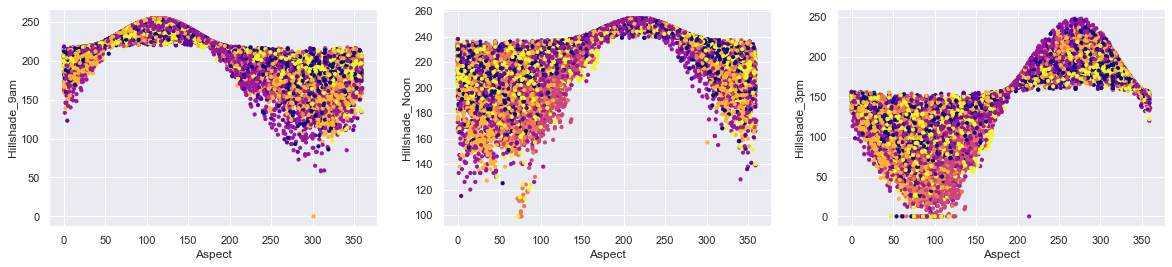

In [ ]:
classes = np.array(list(df_train.Cover_Type.values))
cmap = sns.color_palette("Set2")
def plotRelation(feat1, feat2,cmap ='plasma' ):
    plt.scatter(feat1, feat2, c = classes, s=10,cmap=cmap)
    plt.xlabel(feat1.name)
    plt.ylabel(feat2.name)

ax = plt.figure(figsize = (20,4))
ax.add_subplot(131)
plotRelation( df_train.Aspect,df_train.Hillshade_9am)
ax.add_subplot(132)
plotRelation(df_train.Aspect,df_train.Hillshade_Noon)
ax.add_subplot(133)
plotRelation(df_train.Aspect,df_train.Hillshade_3pm)
ax.savefig('images/full_figure.png')

The strongest light for hillshade is 255, and it is exactly proportional to the Aspect direction. Perhaps these two variables can be combined into one using some equtaion.

**Note: we still haven't imputed the 0 values in `Hillshade_3pm`.** (SEE IF APPLY COLUMN TRANSFORMER OR NOT)

255 is brighvalid light for hillshade and it is directly correlated to Aspect direction. Maybe these two variables can be merged to one with some equtaion.
There is 1 record of Hillshade_9am with a zero value and around 70 records of Hillshade_3pm with zero values. But as per the calculation of Hillshade, 0 values are appropriate. Hence we kept the values as is.

<a id='4.3'></a>
## 4.3 HillShade vs. Slope Scatter Plot 

Remember...
* Slope is the steepness or degree of incline of a surface. Then, the slope for a particular location is computed as the maximum rate of change of elevation between that location and its surroundings. Slope can be expressed either in degrees or as a percentage.

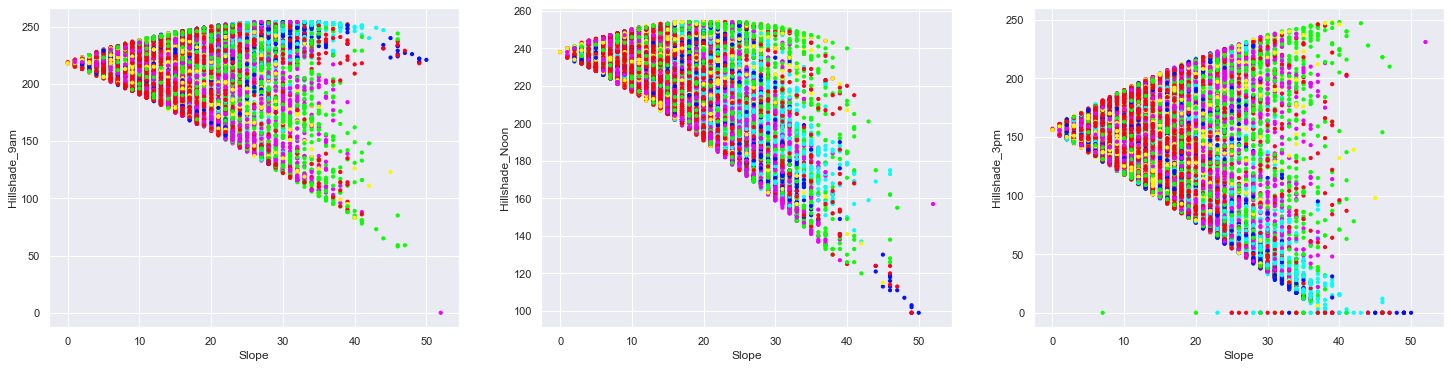

In [ ]:
ax = plt.figure(figsize=(25,20))
ax.add_subplot(331)
plotRelation( df_train.Slope,df_train.Hillshade_9am,cmap='hsv')
ax.add_subplot(332)
plotRelation(df_train.Slope,df_train.Hillshade_Noon,cmap='hsv')
ax.add_subplot(333)
plotRelation(df_train.Slope,df_train.Hillshade_3pm,cmap='hsv')
ax.savefig('images/full_figure2.png')

Also,appear to be correlated. We can also notice that on the graph of `Hillshade_3pm`the 0's we haven't removed look erroneous.

Let’s look at the distribution of the soil type. There are 40 soli types in the dataset.

<a id='4.4'></a>
## 4.4 Soil Type Distribution

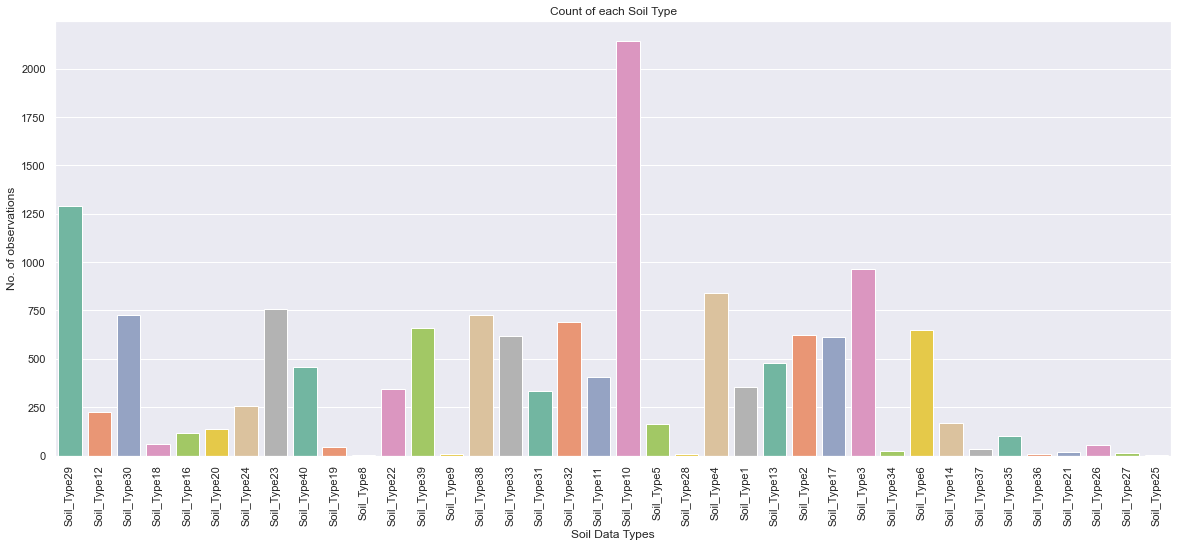

In [ ]:
soil_dummies = df_train.loc[:,df_train.columns.str.startswith('Soil_Type')]
#wild = wild_dummies.idxmax(axis=1)
soil = soil_dummies.idxmax(axis=1)
#wild.name = 'Wilderness'
soil.name = 'Soil'
df_train['Soil'] = soil
plt.figure(figsize=(20,8))
sns.countplot(x='Soil',data=df_train,palette=cmap);
plt.xticks(rotation=90);
plt.xlabel('Soil Data Types')
plt.ylabel('No. of observations')
plt.title('Count of each Soil Type')
plt.savefig('images/full_figure3.png')

* `Soil_Type10`and `Soil_Type29`are the most frequent types of soil types. 
* We will drop `Soil_Type15`and `Soil_Type7`as there are not present in our dataset. 
* We will also consider removing other kinds

We create a function transformer for after.

#### Creating `irrelevant_soil_types_remover`FunctionTransformer
Creating this function transformer, we will be able to see in GridSearch whether it improves our results.

In [ ]:
temp = df_train[soiltype_cols].sum().sort_values()
irrelevant_cols = pd.DataFrame(temp[temp < 100]).T.columns.tolist()
irrelevant_cols

['Soil_Type15',
 'Soil_Type7',
 'Soil_Type8',
 'Soil_Type25',
 'Soil_Type28',
 'Soil_Type36',
 'Soil_Type9',
 'Soil_Type27',
 'Soil_Type21',
 'Soil_Type34',
 'Soil_Type37',
 'Soil_Type19',
 'Soil_Type26',
 'Soil_Type18']

In [ ]:
# def remove_irrelevant_soil_types(df_train):
#     df_train = df_train.drop(columns = ['Soil_Type15','Soil_Type7','Soil_Type8','Soil_Type25','Soil_Type28','Soil_Type36',
#                             'Soil_Type9','Soil_Type27','Soil_Type21','Soil_Type34','Soil_Type37','Soil_Type19',
#                             'Soil_Type26','Soil_Type18'])
#     return df_train

In [ ]:
#irrelevant_soil_types_remover = FunctionTransformer(remove_irrelevant_soil_types)

Soil types 7,8 and 15 do have any records. Hence they can be deleted.

In [ ]:
def remove_soil_type71518(df_train):
    df_train.drop(['Soil_Type7','Soil_Type15','Soil_Type8'],axis='columns',inplace=True)
    return  df_train

In [ ]:
#df_train.drop(['Soil_Type7','Soil_Type15','Soil_Type8'],axis='columns',inplace=True)

In [ ]:
df_train.dtypes

Elevation                               int64
Aspect                                  int64
Slope                                   int64
Horizontal_Distance_To_Hydrology        int64
Vertical_Distance_To_Hydrology          int64
Horizontal_Distance_To_Roadways         int64
Hillshade_9am                           int64
Hillshade_Noon                          int64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points      int64
Wilderness_Area1                        int64
Wilderness_Area2                        int64
Wilderness_Area3                        int64
Wilderness_Area4                        int64
Soil_Type1                              int64
Soil_Type2                              int64
Soil_Type3                              int64
Soil_Type4                              int64
Soil_Type5                              int64
Soil_Type6                              int64
Soil_Type7                              int64
Soil_Type8                        

In [ ]:
df_train.drop(['Soil_Type7','Soil_Type15','Soil_Type8','Slope'],axis='columns',inplace=True)

<a id='4.5'></a>
## 4.4 Correlation Matrix

We do observe a strong correlation between hillshade and aspect as described in the section “Understanding the Feature Dependencies” above.

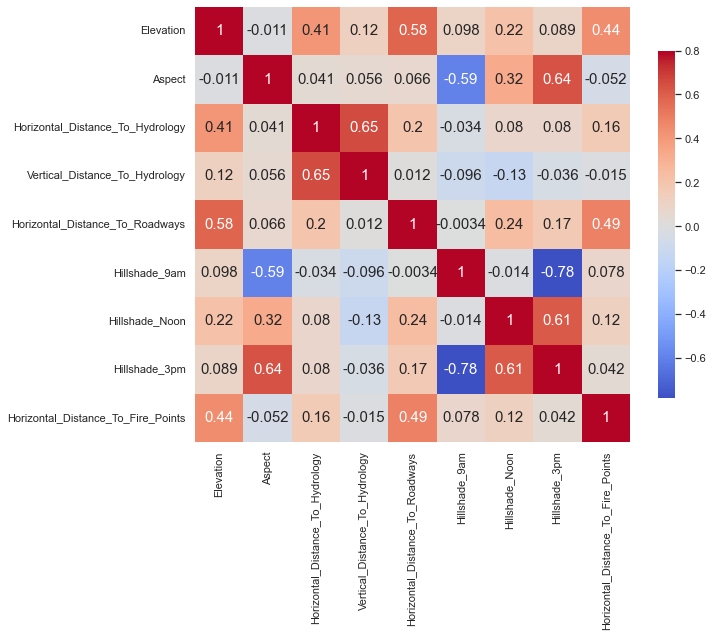

In [ ]:
size = 9
corrmat = df_train.iloc[:,:size].corr()
f, ax = plt.subplots(figsize = (10,8))
sns.heatmap(corrmat,vmax=0.8,square=True, center=0, annot=True, annot_kws={"size": 15}, cbar_kws={"shrink": .8},
            cmap=plt.cm.coolwarm);

We do observe some strong correlations as folllows:

1. Aspect is highly correlated to Hillshade_9am and Hillshade_3pm
2. Slope and Hillshade_Noon
3. Elevation and Horizontal Distance to Roadways
4. Horizontal distance to hydrology is highly correlated to Vertical Distance to Hydrology.
5. Thee three hillshade variables.

Our hypothesis is that the feature selection process later in this notebook will allow us to determine which of the highly correlated features should be dropped from our feature set, if any.

<a id='5'></a>
# 5. Split the Dataset into train and validation

To compare ML models and create a baseline, the data frames trees training and labels training are divided into training and validation sets.

- The training set is used as an input, so that the machine learning models can detect patterns and use them to differentiate the target. It is basically a set of exampls used for leaning (by the model), i.e. to fit the parameters to the machine learning model.
- The validation set is used to assess the peformance of the machine learning model and measure its capacity to generalize patterns to a new data set. It is a set of examples used to tune the hyperparamers of the classifiers to have an unbiased evaluation of the model fitted on the traininng dataset; otherwise the machine learning model will learn the best parameters and we would be tuning the hyperparameters only for our specific training dataset. We want to select the best hyperparameters that generalize for new data.We use this validation set to *evaluate* out models.

When the best hyprparameters are chosen we will merge the training and valid set to train the model on a bigger dataset and then evaluate the model's final peformance with a valid data with no labels; in order to have an unbiased evaluation of a final model fitted on the training dataset. This is the final Kaggle Score we will have. The valid set is used to *validate* our models to see whether our modern will work in production i.e. un seen data.


We **EVALUATE** our models in either of these two ways:
    1. With the validation and valid set (cell below)
    2. or with the `cross_val_score` function

The first approach is only done on the baseline models. This is because the splitting is done randomly and the peformance of the model can either be too optimistic or pesimistic. An example of how the peformanc metric may change is in [6.1. Naive Bayes Classifier ](#6.1) where we compute both the `cross_val_score`and then use the `train_valid_split`to see the classification report. As you can see (below), the solution to this is to split the data into many different splits, compute the peformance of each and average this peformance. This is *cross validation* and what the `cross_val_score` function is doing. Therefore, we use  the same model and same data set, only change the random assignation of valid/training/validation set.


In [ ]:
# Now split the data randomly into train and validation set 
X = df_train.drop(['Cover_Type'], axis = 1)
y = df_train['Cover_Type']
X_train, X_val, y_train, y_val = train_test_split(
            X, y, test_size=0.20, random_state=42,stratify=y)
print("The shape of validation data:{} and {} ".format(X_val.shape,y_val.shape))
print("The shape of training data:{} and {} ".format(X_train.shape,y_train.shape))
# Added the label temporariliy for EDA
X_train['Cover_Type'] = y_train

The shape of validation data:(3024, 55) and (3024,) 
The shape of training data:(12096, 55) and (12096,) 


In [ ]:
X_train.drop(['Cover_Type','Soil'], axis = 1,inplace=True)
X_val.drop(['Soil'], axis = 1,inplace=True)

We run basic models as baseline models to explore in which direction we should refine our model.

We make a copy of the original training and validation sets.

In [ ]:
X_train_orig=X_train.copy()
y_train_orig = y_train.copy()

X_val_orig = X_val.copy()
y_val_orig = y_val.copy()

<a id='6'></a>
# 6.  Running the Baseline Model

We run three models from the original data provided:
1. Naive Bayes Classifier
1. KNN Nearest Neighbours Classifier 
2. Logistic Regression

<a id='6.1'></a>
## 6.1. Naive Bayes Classifier 

#### Cross Validation

In [ ]:
from sklearn.naive_bayes import MultinomialNB

nb_pipeline = Pipeline(steps = [('rscale',RobustScaler()),
                                ('minmax',MinMaxScaler()),
                                 ('nb',MultinomialNB())])

X = df_train.iloc[:,:50]
y = df_train.Cover_Type

print("Accuracy of the full dataset Naive Bayes classifier = {0:.4f}".format(np.mean(cross_val_score(nb_pipeline, X, y, scoring = 'accuracy'))))


Accuracy of the full dataset Naive Bayes classifier = 0.5364


#### Train valid Split

In [ ]:
nb_pipeline.fit(X_train_orig, y_train_orig)

accuracy_score(y_val_orig, nb_pipeline.predict(X_val_orig))



0.5856481481481481

As you see, this time we got lucky with the splitting and it leading to inflated peformance metric. Nevertheless, we use this to have a look at the classification report.

In [ ]:
target_names = ['Cover Type 1', 'Cover Type 2', 'Cover Type 3','Cover Type 4','Cover Type 5','Cover Type 6','Cover Type 7']
labels=[1,2,3,4,5,6,7]
report= classification_report(y_val_orig, nb_pipeline.predict(X_val_orig),target_names=target_names,
                                         labels=labels)
print(report)


              precision    recall  f1-score   support

Cover Type 1       0.59      0.43      0.50       432
Cover Type 2       0.41      0.56      0.47       432
Cover Type 3       0.50      0.36      0.41       432
Cover Type 4       0.69      0.82      0.75       432
Cover Type 5       0.56      0.54      0.55       432
Cover Type 6       0.51      0.58      0.54       432
Cover Type 7       0.89      0.81      0.85       432

    accuracy                           0.59      3024
   macro avg       0.59      0.59      0.58      3024
weighted avg       0.59      0.59      0.58      3024



In [ ]:
cm = confusion_matrix(y_val_orig,nb_pipeline.predict(X_val_orig))
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm.diagonal()

array([0.43055556, 0.55555556, 0.35648148, 0.81944444, 0.54398148,
       0.58101852, 0.8125    ])

This array indicates the accuracy for each class; being lowest for Cover Type 3, then 1 and 2 and 6.

<a id='6.2'></a>
## 6.2. KNN Classifier

We run the supervised classification non-parametric algorithim KNN, trying different parameters of k. `k`is a parameter that refers to the number of nearest neighbors to include in the majority of the voting process. 

It simply calculates the distance of a new data point to all other training data points. The distance can be of any type e.g Euclidean or Manhattan etc. Therefore, it is important to *SCALE*, otherwuse algorithim fooled by differences in scales.. It then selects the K-nearest data points, where K can be any integer. Finally it assigns the data point to the class to which the majority of the K data points belong.

How you define the similarity is the main idea (main hyperparameter) and the number of data points (k) you want to consider. The default similarity metric distance metric is minkowski in scikit-learn, and with p=2 is equivalent to the standard Euclidean metric, which is the one that we use.

#### Cross Validation

In [ ]:
from sklearn.pipeline import Pipeline
knn_pipeline = Pipeline(steps = [('scaler',StandardScaler()),
                             ('knn',KNeighborsClassifier())
                            ])

X = df_train.iloc[:,:50]
y = df_train.Cover_Type

print("Accuracy of the full dataset KNN classifier = {0:.4f}".format(np.mean(cross_val_score(knn_pipeline, X, y, scoring = 'accuracy'))))
# Run KNN with only the Original data provided


Accuracy of the full dataset KNN classifier = 0.6833


In [ ]:
sklearn.set_config(display = 'diagram')

#### Train valid Split

Preliminary model score:
0.8042328042328042


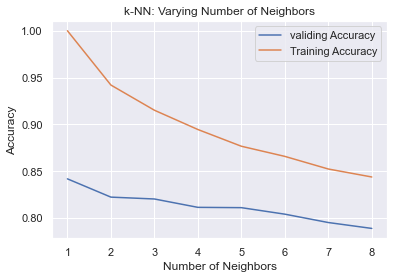

<Figure size 432x288 with 0 Axes>

In [ ]:
#Split arrays or matrices into train and valid subsets

knn = KNeighborsClassifier(n_neighbors=7)  
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train_orig,y_train_orig)

print("Preliminary model score:")
print(knn.score(X_val_orig,y_val_orig))

no_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(no_neighbors))
valid_accuracy = np.empty(len(no_neighbors))

for i, k in enumerate(no_neighbors):
    # We instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit the classifier to the training data
    knn.fit(X_train_orig,y_train_orig)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train_orig, y_train_orig)

    # Compute accuracy on the validing set
    valid_accuracy[i] = knn.score(X_val_orig, y_val_orig)

# Visualization of k values vs accuracy

plt.title('k-NN: Varying Number of Neighbors')
plt.plot(no_neighbors, valid_accuracy, label = 'validing Accuracy')
plt.plot(no_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
plt.savefig('images/full_figure5.png')

As you can see here, the where k = 1, the training score is really high and the testing score really low. This is because of **OVERFITTING**. k = 1,  model makes decision based on 1 data point; it will be very sensitive to noises in the training data set. 

As you increase k, the decision boundary is more stable but if its too large, the algorithim will consider too many data poits and will be making decision based on the average of the data i.e. it will not learn anything.(**UNDERFITTING**).

<a id='6.3'></a>
## 6.3. Logistic Regression Classsifier

#### Cross Validation

In [ ]:
from sklearn.pipeline import Pipeline

lg_clf = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs')
lg_pipeline = Pipeline(steps = [('scaler',StandardScaler()),
                             ('lg',lg_clf)
                            ])

X = df_train.iloc[:,:50]
y = df_train.Cover_Type

print("Accuracy of the full dataset KNN classifier = {0:.4f}".format(np.mean(cross_val_score(lg_pipeline, X, y, scoring = 'accuracy'))))


Accuracy of the full dataset KNN classifier = 0.6454


In [ ]:
scores = cross_val_score(lg_pipeline, X, y)

#### Train Test Split

In [ ]:
lg_pipeline.fit(X_train_orig, y_train_orig)

print("Accuracy of our baseline logistic regression model is",accuracy_score(y_val_orig,lg_pipeline.predict(X_val_orig))) 

Accuracy of our baseline logistic regression model is 0.6888227513227513


<a id='7'></a>
# 7. Feature Engineering

Feature engineering is the process of selecting and transforming features when building a machine learning predictive model. It's an effective method for improving prediction models because it entails extracting crucial information, identifying patterns, and bringing in someone with domain expertise for the creating of the new features. Feature engineering not only prepares the dataset for compatibility with the algorithm, but it also increases the performance of the machine learning models.

Featue Engineering means basically converting features to be:

1) *Informative* i.e. relevant to what you are trying to predict.
2) *Discriminating* i.e an ideal feature should /if equally distributed with feature you want to be predicted
2) *Independant* i.e. do not want correlated features in model (ideal scenario not correlated but not possible)

<a id='7.1'></a>
## 7.1 Feature Extraction

Good features plays icredible role in model evaluation. We created: 

*  **Linear combination** : Horizontal dist. to Hydrology may be in the same direction as Fire Points or opposite. Hence, distance between the two can be found either by summing the distance or taking the difference
    * Horizontal dist. to Hydrology, Horizontal dist. to Fire Points
    * Horizontal dist. to Hydrology, Horizontal dist. to Roadways
    * Horizontal dist. to Fire Points, Horizontal dist. to Roadways
* **Euclidean distance**:The euclidean distance is applied to attributes Horizontal distance to Hydrology and Vertical distance to Hydrology, generating 1 new attribute.

In [ ]:
def construct_features(df):
    df['Ele_minus_VDtHyd'] = (df['Elevation']-df['Vertical_Distance_To_Hydrology'])
    df['Ele_plus_VDtHyd'] = (df['Elevation']+df['Vertical_Distance_To_Hydrology'])
    df['Distance_to_Hydrolody'] = (df['Horizontal_Distance_To_Hydrology']**2+df['Vertical_Distance_To_Hydrology']**2)**0.5
    df['Hydro_plus_Fire'] = df['Horizontal_Distance_To_Hydrology']+df['Horizontal_Distance_To_Fire_Points']
    df['Hydro_minus_Fire'] = df['Horizontal_Distance_To_Hydrology']-df['Horizontal_Distance_To_Fire_Points']
    df['Hydro_plus_Road'] = df['Horizontal_Distance_To_Hydrology']+df['Horizontal_Distance_To_Roadways']
    df['Hydro_minus_Road'] = df['Horizontal_Distance_To_Hydrology']-df['Horizontal_Distance_To_Roadways']
    df['Fire_plus_Road'] = df['Horizontal_Distance_To_Fire_Points']+df['Horizontal_Distance_To_Roadways']
    df['Fire_minus_Road'] = df['Horizontal_Distance_To_Fire_Points']-df['Horizontal_Distance_To_Roadways']
    return df

In [ ]:
construct_features(X_train)
construct_features(X_val)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type40,Ele_minus_VDtHyd,Ele_plus_VDtHyd,Distance_to_Hydrolody,Hydro_plus_Fire,Hydro_minus_Fire,Hydro_plus_Road,Hydro_minus_Road,Fire_plus_Road,Fire_minus_Road
Id,,,,,,,,,,,,,,,,,,,,,
3552,2311,102,25,525,17,1392,252,199,59,947,...,0,2294,2328,525.275166,1472,-422,1917,-867,2339,-445
5929,2315,315,18,134,28,1500,170,223,192,660,...,0,2287,2343,136.894120,794,-526,1634,-1366,2160,-840
13058,2276,91,16,0,0,1072,243,212,93,1201,...,0,2276,2276,0.000000,1201,-1201,1072,-1072,2273,129
2816,2797,174,23,272,91,600,226,245,138,577,...,0,2706,2888,286.818758,849,-305,872,-328,1177,-23
12193,2038,15,3,0,0,700,217,233,154,691,...,0,2038,2038,0.000000,691,-691,700,-700,1391,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9602,3497,306,11,324,37,5287,190,234,184,4290,...,0,3460,3534,326.105811,4614,-3966,5611,-4963,9577,-997
14279,2750,281,5,371,49,1381,206,240,173,1935,...,0,2701,2799,374.221859,2306,-1564,1752,-1010,3316,554
13277,2341,88,20,0,0,853,245,203,79,1050,...,0,2341,2341,0.000000,1050,-1050,853,-853,1903,197


In [ ]:
X_train.drop(['Vertical_Distance_To_Hydrology'],axis='columns',inplace=True)
X_val.drop(['Vertical_Distance_To_Hydrology'],axis='columns',inplace=True)

In [ ]:
print("Number of initial features ",X_train_orig.shape[1])
print("Number of features after feature engineering",X_train.shape[1])

Number of initial features  54
Number of features after feature engineering 62


In [ ]:
all_data = pd.concat([X_train, X_val], ignore_index=True)
all_y = np.hstack((y_train,y_val))
all_data['Cover_Type'] = all_y

<a id='7.2'></a>
## 7.2 Feature Selection

Feature selection can be an important part of the machine learning process as it has the ability to greatly improve the performance of our models. While it might seem intuitive to provide a model with all of the information you have with the thinking that the more data you provide, the better it can learn and generalize, it’s important to also recognize that the data necessary to train a model grows exponentially with the number of features uses to train the model.

We will run L1 regularization, L2 regularization and Feature Importance with ExtraTreesClassifier first, fetch the important features and re-run the models again to evaluate performance.

<a id='7.2.1'></a>
### 7.2.1 Finding Feature Importance with ExtraTreesClassifier

Extra Tree classifier is an ensemble model similar to random forest. Random forest is bagging ensembling model where each tree comprises of the square root of the total number of features, and makes use of bootstrap samples or samples with replacement. The main difference between Extremely Randomized Trees Classifier is how it selects the samples. It selects samples on every decision tree without replacement therefore all the samples will be unique in nature. The total number of features still remains the same (square root of features if we are doing a classification task). Therefore, instead of computing the locally optimum split for a feature combination, a random value is selected for the split leading to more diversified trees. Extremely Randomized Trees Classifier normally outperform Random Forest classifier when there is noisy features. However, when all the features are relevant, they perform equally.

ExtraTreesClassifier is a randomized decision tree classifier which samples a random subset of the feature-space when deciding where to make the next split. Extra trees seem to keep a higher performance in presence of noisy features.

In [ ]:
def getImportance(classifier,cols,title):
    """ Create a chart of feature importances given a tree classifier."""

    importances = classifier.feature_importances_
    indices=np.argsort(importances)[::-1][:30]
    # Plot the feature importances of the forest
    plt.figure(figsize=(50,20))
    plt.title(title,fontsize=45)
    plt.bar(range(30), importances[indices],
       align="center",alpha=.5)
    plt.xticks(range(30), cols[indices], rotation=45, rotation_mode="anchor", ha="right",fontsize=30)
    plt.yticks(fontsize=30)
    plt.xlim([-1, 30])
    plt.show()

In [ ]:
# Build a forest and compute the feature importances
n_estimators = list(range(50, 250,5))
criterion=['gini','entropy']
param_grid = dict(n_estimators=n_estimators, criterion=criterion)

forest = ExtraTreesClassifier(random_state=0)
grid_etc = RandomizedSearchCV(forest, param_grid, cv=5, scoring="accuracy" ,return_train_score=False)
grid_etc.fit(X_train, y_train)
print("The best score: ",grid_etc.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_etc.best_params_)
grid_etc.best_estimator_

The best score:  0.8936
The best parameter:  {'n_estimators': 210, 'criterion': 'gini'}


ExtraTreesClassifier(n_estimators=210, random_state=0)

The accuracy score of the ExtraTreesClassifier:  0.9


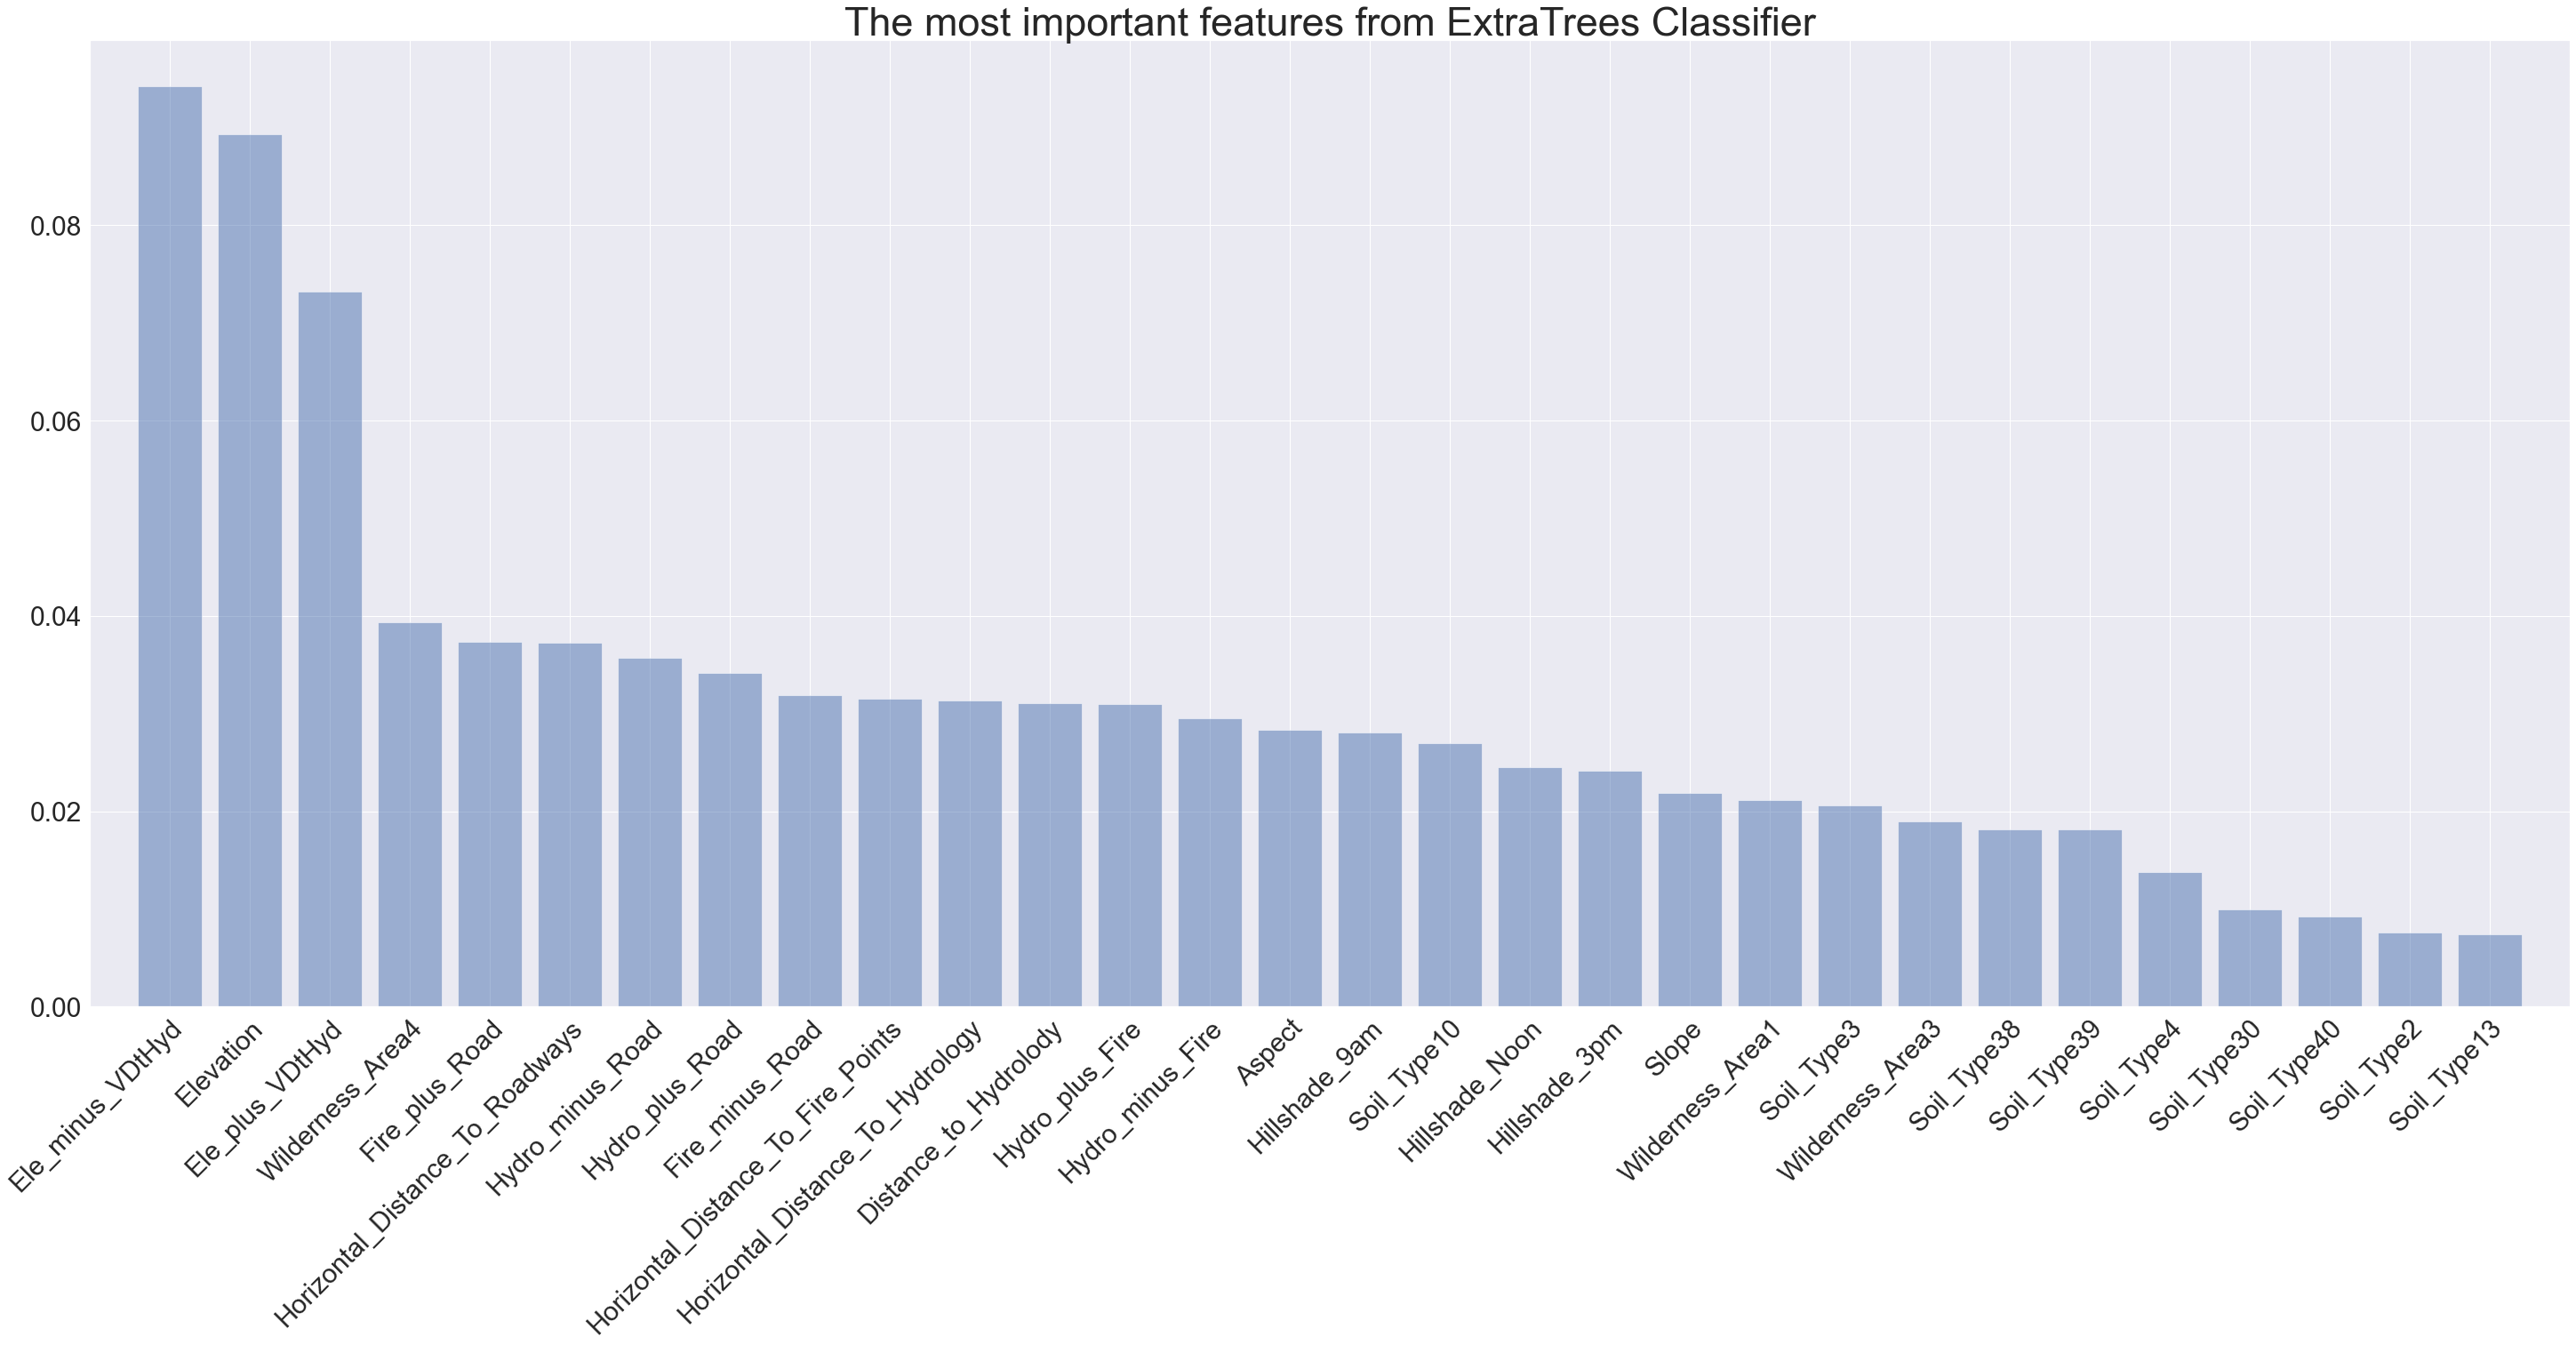

In [ ]:
#Find Feature importance
etc_final = ExtraTreesClassifier(n_estimators=grid_etc.best_params_['n_estimators'],
                            criterion=grid_etc.best_params_['criterion'],random_state=0)
etc_final.fit(X_train, y_train)
etc_acc = etc_final.score(X_val,y_val)
print("The accuracy score of the ExtraTreesClassifier: ",round(etc_acc,2))
importances = etc_final.feature_importances_
indices = np.argsort(importances)[::-1]
getImportance(etc_final,X_train.columns,"The most important features from ExtraTrees Classifier")

**Extract smaller featureset** : We will be using a threshold of 0.01 to fetch the important features only.

In [ ]:
select_model = SelectFromModel(etc_final, threshold=0.01, prefit=True)
X_train_selected = select_model.transform(X_train)
X_val_selected = select_model.transform(X_val)
print("The shape of the selected training dataset " ,X_train_selected.shape)
print("The shape of the selected validation dataset " ,X_val_selected.shape )

The shape of the selected training dataset  (12096, 26)
The shape of the selected validation dataset  (3024, 26)


#### Re-Run ExtraTreesClassifier with the selected features only

In [ ]:
# Build a forest with the important features only
grid_etc_selected = RandomizedSearchCV(forest, param_grid, cv=5, scoring="accuracy" ,return_train_score=False)
grid_etc_selected.fit(X_train_selected, y_train)
print("The best score: ",grid_etc_selected.best_score_.round(4))
#Parameter setting that gave the best results on the hold out data.
print("The best parameter: ",grid_etc_selected.best_params_)
grid_etc_selected.best_estimator_

The best score:  0.8848
The best parameter:  {'n_estimators': 145, 'criterion': 'gini'}


ExtraTreesClassifier(n_estimators=145, random_state=0)

In [ ]:
#Find Feature importance
etc_selected = ExtraTreesClassifier(n_estimators=grid_etc_selected.best_params_['n_estimators'],
                            criterion=grid_etc_selected.best_params_['criterion'],random_state=0)
etc_selected.fit(X_train_selected, y_train)
etc_sel_acc = etc_selected.score(X_val_selected,y_val)
print("The accuracy score of the ExtraTreesClassifier with the selected features: ",round(etc_sel_acc,2))

The accuracy score of the ExtraTreesClassifier with the selected features:  0.89


As seen above, the accuracy of the model did not decrease much after reducing the feature set to 26. That means the rest of the data was not explaining any variance in the model or influencing the outcome.

<a id='7.2.2'></a>
### 7.2.2. Feature Selection with L1 Regularization(Lasso) and L2 Regularization(Ridge)

To avoid overfitting, there are only two solutions: add more observations to training set or regularization. Since, we have not been provided more data, we will apply two regularization techniques which both share the same concept of adding constraints on weights of independent variables; however they differ in the way of constraining. First, lets look at Ridge regression also called Tikhonov regularization. What it does is simply add regularization term to the cost function which keeps model weights small as possible, how small you want to keep the weights depend on hyperparameter  λ.When  λ = 0 no regularization and model will overfit. When extremely large, model will focus on regularization error and not on residuals. Only difference between Ridge and Lasso regularization term is that in Lasso regression it adds L1 norm of weight vector to the cost function which allows Lasso regression to eliminate least important features i.e. it performs auto feature selection.

We now do a Logistic Regression with L1 regularization, discarding the zero coefficient features. We then run a L2 Logistic Regression too.

In [ ]:
def get_feature_importance(clf, feature_names):
    """
    Function to print the most important features of a logreg classifier based on the coefficient values
    """
    return pd.DataFrame({'variable': feature_names, # Feature names
                         'coefficient': clf.coef_[0] # Feature Coeficients
                    }) \
    .round(decimals=2) \
    .sort_values('coefficient', ascending=False) \
    .style.bar(color=['red', 'green'], align='zero')

In [ ]:
#Run Logistic Regression with engineered features provided & L1 Regularization
logreg_l1 = LogisticRegression(penalty = 'l1',solver='saga', multi_class='multinomial',max_iter=10000)
logreg_l1.fit(X_train, y_train)
y_pred_l1 = logreg_l1.predict(X_val)
print("Accuracy with L1 regularization and Engineered Data",accuracy_score(y_val,y_pred_l1)) 

model = SelectFromModel(logreg_l1, threshold=0.00, prefit=True)
X_train_l1_selected = model.transform(X_train)
X_val_l1_selected = model.transform(X_val)

print("The shape of the selected training dataset " ,X_train_l1_selected.shape)
print("The shape of the selected validation dataset " ,X_val_l1_selected.shape )

In [ ]:
get_feature_importance(logreg_l1, X_train.columns.get_level_values(0).tolist())

In [ ]:
logreg_l2 = LogisticRegression(penalty = 'l2',solver='saga', multi_class='multinomial',max_iter=10000)
logreg_l2.fit(X_train, y_train)
y_pred_l2 = logreg_l1.predict(X_val)
print("Accuracy with L2 regularization and  Engineered Data",accuracy_score(y_val,y_pred_l2))

model2 = SelectFromModel(logreg_l2, threshold=0.00, prefit=True)
X_train_l2_selected = model2.transform(X_train)
X_val_l2_selected = model2.transform(X_val)

print("The shape of the selected training dataset " ,X_train_l2_selected.shape)
print("The shape of the selected validation dataset " ,X_val_l2_selected.shape )

In [ ]:
get_feature_importance(logreg_l2, X_train.columns.get_level_values(0).tolist())

Performance is quite similar, however, we have achieved it with almost half the features than with the original model. We are using L1 Regularization because we have the same accuracy with L2 regularization but it removes more feature than L2 Regularization.

<a id='7.2.3'></a>
### 7.2.3 Principal Component Analysis (PCA)

Principal Component Analysis (PCA) is a technique (not an algorithim) to reduce the dimension of variables. PCA is a technique for reducing the dimension of a dataset. Find a small number of representative variables (linear combinations of the predictors, known as principal components PCs), which capture the most possible variance. It combines all the correlated features in a unique principal component and summarizes many variables in a lot of dimensions in a unique dimension.

In [ ]:
# Run PCA to determine the number of principal components to use
from sklearn.decomposition import PCA
pca_mod = PCA()
pca_mod.fit(X_train)
num_features_selected = X_train.shape[1]
print("Number of features in combined, feature-reduced data sets = %d" % num_features_selected)
var_arr=np.zeros((num_features_selected))
cum_var_arr=np.zeros((num_features_selected))
cum_var=0.0

for n_comp in range(1,num_features_selected + 1):
    cum_var = cum_var + pca_mod.explained_variance_ratio_[n_comp - 1]
    var_arr[n_comp - 1] = round(pca_mod.explained_variance_ratio_[n_comp - 1],2)
    cum_var_arr[n_comp - 1] = round(cum_var,3)


    var_rslts = pd.DataFrame({'Principal Component':range(1,num_features_selected + 1),'Variance Explained'
                              :var_arr,'Cumulative Variance Explained':cum_var_arr})

In [ ]:
#Plot cumulative variance explained
plt.plot(var_rslts['Principal Component'],var_rslts['Cumulative Variance Explained'])
plt.xlabel("Principal Component")
plt.ylabel("Cumulative Variance Explained")

var_rslts.set_index('Principal Component',inplace=True)

var_rslts

Looks Like most variance (99.9%) is explained once we reach 5 principal components, so let's create training and validation data sets using the first 5 principal components

In [ ]:
pca_mod = PCA(n_components=5)
dimr_X_train_final_selected = pca_mod.fit_transform(X_train)
dimr_X_val_final_selected = pca_mod.transform(X_val)

print("Size of the dimensionality reduced training dataset", dimr_X_train_final_selected.shape)
print("Size of the dimensionality reduced validation dataset", dimr_X_val_final_selected.shape)

### Check the model with PCA

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=100,n_jobs=-1,random_state=0)
etc.fit(dimr_X_train_final_selected, y_train)
y_pred_etc = etc.predict(dimr_X_val_final_selected)
print("The accuracy score of the selected feature : ",accuracy_score(y_pred_etc,y_val))

Eventhough the our pca reduces number of features to 5, our accuracy reduced by 4%, so we wont be using PCA for our final model.

<a id='8'></a>
# 8. Model Creation, Comparaison and Hyperparameter Tuning

<a id='8.1 '></a>
## 8. 1. GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# param_list = {'n_estimators':range(20,81,10),
#                'max_depth':range(5,16,2),
#                'min_samples_split':range(200,1001,200),
#                'min_samples_split':range(1000,2100,200),
#                'min_samples_leaf':range(30,71,10),
#                'max_features':range(7,20,2)}
param_list = {}
gbc = GradientBoostingClassifier(learning_rate=0.1, subsample=0.8, random_state=10)

gs = GridSearchCV(estimator = gbc,param_grid = param_list, scoring='accuracy',n_jobs=-1, cv=5)
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

y_pred_gbc = gs.best_estimator_.predict(X_val)
print("The accuracy score of the selected feature : ",accuracy_score(y_pred_gbc,y_val))

<a id='8.2'></a>
## 8.2 RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=0)

n_estimators = [100,200, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

# param_list = dict(n_estimators = n_estimators, max_depth = max_depth,  
#               min_samples_split = min_samples_split, 
#              min_samples_leaf = min_samples_leaf)

param_list={}

gs = GridSearchCV(rfc, param_grid = param_list, cv = 5, n_jobs = -1,scoring='accuracy')
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

y_pred_rfc = gs.best_estimator_.predict(X_val)
print("The accuracy score of the selected feature : ",accuracy_score(y_pred_rfc,y_val))


<a id='8.3'></a>
# 8.3. Extra Tree Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(random_state=0)

# param_grid = {
#     'n_estimators': [100,300,500,600,650,750],
#     'max_depth': [2,8,16,32,50],
#     'min_samples_split': [2,4,6],
#     'min_samples_leaf': [1,2,5,10],
#     'max_features':[0.2,0.25,0.3,0.35]
# }

param_grid={}

gs = GridSearchCV(etc, param_grid = param_grid, cv = 5, n_jobs = -1,scoring='accuracy')
gs.fit(X_train, y_train)

print(gs.best_params_, gs.best_score_)

y_pred_etc = gs.best_estimator_.predict(X_val)
print("The accuracy score of the selected feature : ",accuracy_score(y_pred_etc,y_val))

<a id='9'></a>
# 9. Creating Kaggle Predictions from Chosen Model

### Select the best model and train it on all data then create submission file using that model

In [ ]:
X_train_l1_selected.shape

In [ ]:
all_x_train = X_train.append(X_val, ignore_index=True)
all_x_train.shape

In [ ]:
all_y_train = np.hstack((y_train,y_val))
all_y_train.shape

In [ ]:
from sklearn.model_selection import cross_val_score
def cv_score(clf,x_train,y_train):
    score=cross_val_score(clf, x_train, y_train, scoring=None, 
                                           cv=10, n_jobs=1, verbose=0, fit_params=None, 
                                           pre_dispatch='2*n_jobs')                                      
    return score.mean()

In [ ]:
clf=ExtraTreesClassifier(max_features= 0.35, n_estimators= 650)
score=cv_score(clf,all_x_train,all_y_train)
print(score)

In [ ]:
# Read in the valid data
kaggle_df_train = pd.read_csv('data/valid.csv', engine='c')
kaggle_df_train.head()

In [ ]:
kaggle_df_train[kaggle_df_train.isnull().any(axis=1)]
kaggle_df_train.set_index('Id',inplace=True)

# drop soil types that were dropped due to no values for them in the training data
kaggle_df_train.drop(['Soil_Type7','Soil_Type15','Soil_Type8','Slope'],axis='columns',inplace=True)

In [ ]:
###Repeat for X_val
kaggle_df_train['Ele_minus_VDtHyd'] = kaggle_df_train.Elevation-kaggle_df_train.Vertical_Distance_To_Hydrology
kaggle_df_train['Ele_plus_VDtHyd'] = kaggle_df_train.Elevation+kaggle_df_train.Vertical_Distance_To_Hydrology
kaggle_df_train['Distanse_to_Hydrolody'] = (kaggle_df_train['Horizontal_Distance_To_Hydrology']**2+kaggle_df_train['Vertical_Distance_To_Hydrology']**2)**0.5
kaggle_df_train['Hydro_plus_Fire'] = kaggle_df_train['Horizontal_Distance_To_Hydrology']+kaggle_df_train['Horizontal_Distance_To_Fire_Points']
kaggle_df_train['Hydro_minus_Fire'] = kaggle_df_train['Horizontal_Distance_To_Hydrology']-kaggle_df_train['Horizontal_Distance_To_Fire_Points']
kaggle_df_train['Hydro_plus_Road'] = kaggle_df_train['Horizontal_Distance_To_Hydrology']+kaggle_df_train['Horizontal_Distance_To_Roadways']
kaggle_df_train['Hydro_minus_Road'] = kaggle_df_train['Horizontal_Distance_To_Hydrology']-kaggle_df_train['Horizontal_Distance_To_Roadways']
kaggle_df_train['Fire_plus_Road'] = kaggle_df_train['Horizontal_Distance_To_Fire_Points']+kaggle_df_train['Horizontal_Distance_To_Roadways']
kaggle_df_train['Fire_minus_Road'] = kaggle_df_train['Horizontal_Distance_To_Fire_Points']-kaggle_df_train['Horizontal_Distance_To_Roadways']


In [ ]:
kaggle_df_train.drop(['Vertical_Distance_To_Hydrology'],axis='columns',inplace=True)

In [ ]:
kaggle_df_train.shape

In [ ]:
valid_ids = kaggle_df_train.index

In [ ]:
def clf_predict(clf,X_train,y,X_valid):
    y_pred=clf.fit(X_train,y).predict(X_valid)
    return y_pred

In [ ]:
def write_result(valid_ids,y_pred,filename):
    with open(filename, "w") as outfile:
        outfile.write("Id,Cover_Type\n")
        for e, val in enumerate(list(y_pred)):
            outfile.write("%s,%s\n"%(valid_ids[e],val))

In [ ]:
all_x_train

In [ ]:
pd.Series(all_y_train)

In [ ]:
clf=ExtraTreesClassifier(max_features= 0.35, n_estimators= 650)
y_pred=clf_predict(clf,all_x_train,all_y_train,kaggle_df_train)

In [ ]:
write_result(valid_ids,y_pred,'submission7.csv')

In [ ]:
df_train_sub = pd.read_csv("submission7.csv")

In [ ]:
df_train_sub.head()

In [ ]:
df_train_sub['Cover_Type'].value_counts()